Final Project

In [1042]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from pathlib import Path
import seaborn as sns
import math, re, random
from scipy.spatial.distance import cosine
from collections import Counter
from ast import literal_eval
from sklearn.preprocessing import StandardScaler
import os
from matplotlib import pyplot as plt
from pathlib import Path
from collections import Counter
from pathlib import Path
from csv import reader


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from pathlib import Path
import math

In [1043]:
myPath1 = Path('readable/speakerData.tsv', error_bad_lines=False, sep='\t', header=None)
data1 = pd.read_csv(myPath1, sep='\t', encoding = 'utf-8')

In [1044]:
data1.shape

(1019, 14)

In [1045]:
data1=pd.DataFrame(data1)

In [1046]:
myPath3 = Path('readable/IS 417 Map - Sheet1.csv', error_bad_lines=False, sep=',', header=None)
data3 = pd.read_csv(myPath3, sep=',', encoding = 'utf-8')

In [1047]:
data3=pd.DataFrame(data3)
##data3

In [1048]:
data1=data1.join(data3.set_index('speaker ID'), on='speakerID')

In [1049]:
myPath104 = Path('readable/S104_members.csv', error_bad_lines=False, sep=',', header=None)
c104 = pd.read_csv(myPath104, sep=',', encoding = 'utf-8')
c104=pd.DataFrame(c104)

In [1050]:
myPath105 = Path('readable/S105_members.csv', error_bad_lines=False, sep=',', header=None)
c105 = pd.read_csv(myPath105, sep=',', encoding = 'utf-8')
c105=pd.DataFrame(c105)

In [1051]:
myPath106 = Path('readable/S106_members.csv', error_bad_lines=False, sep=',', header=None)
c106 = pd.read_csv(myPath106, sep=',', encoding = 'utf-8')
c106=pd.DataFrame(c106)

In [1052]:
myPath107 = Path('readable/S107_members.csv', error_bad_lines=False, sep=',', header=None)
c107 = pd.read_csv(myPath107, sep=',', encoding = 'utf-8')
c107=pd.DataFrame(c107)

In [1053]:
myPath108 = Path('readable/S108_members.csv', error_bad_lines=False, sep=',', header=None)
c108 = pd.read_csv(myPath108, sep=',', encoding = 'utf-8')
c108=pd.DataFrame(c108)

In [1054]:
myPath109 = Path('readable/S109_members.csv', error_bad_lines=False, sep=',', header=None)
c109 = pd.read_csv(myPath109, sep=',', encoding = 'utf-8')
c109=pd.DataFrame(c109)

In [1055]:
myPath110 = Path('readable/S110_members.csv', error_bad_lines=False, sep=',', header=None)
c110 = pd.read_csv(myPath110, sep=',', encoding = 'utf-8')
c110=pd.DataFrame(c110)

In [1056]:
myPath111 = Path('readable/S111_members.csv', error_bad_lines=False, sep=',', header=None)
c111 = pd.read_csv(myPath111, sep=',', encoding = 'utf-8')
c111=pd.DataFrame(c111)

In [1057]:
myPath112 = Path('readable/S112_members.csv', error_bad_lines=False, sep=',', header=None)
c112 = pd.read_csv(myPath112, sep=',', encoding = 'utf-8')
c112=pd.DataFrame(c112)

In [1058]:
myPath113 = Path('readable/S113_members.csv', error_bad_lines=False, sep=',', header=None)
c113 = pd.read_csv(myPath113, sep=',', encoding = 'utf-8')
c113=pd.DataFrame(c113)

In [1059]:
data1.merge(c104.loc[:,['bioname','nokken_poole_dim1', 'congress']], left_on= ['speakerNameVote', 'congress'],
                   right_on= ['bioname','congress'], 
                   how = 'inner')

,speaker,congress,first.name,last.name,state,party,speaker.name,speakerID,stateName,retiring,running,appointeeRunning,specialElection,female,speakerNameSpeech,speakerNameVote,bioname,nokken_poole_dim1
0,mr abraham,104,Spencer,Abraham,MI,R,Abraham (MI),1,Michigan,0,0,0,0,0,Abraham (MI),"ABRAHAM, Spencer","ABRAHAM, Spencer",0.330
1,mr akaka,104,Daniel,Akaka,HI,D,Akaka (HI),2,Hawaii,0,0,0,0,0,Akaka (HI),"AKAKA, Daniel Kahikina","AKAKA, Daniel Kahikina",-0.414
2,mr ashcroft,104,John,Ashcroft,MO,R,Ashcroft (MO),6,Missouri,0,0,0,0,0,Ashcroft (MO),"ASHCROFT, John David","ASHCROFT, John David",0.538
3,mr baucus,104,Max,Baucus,MT,D,Baucus (MT),11,Montana,0,1,0,0,0,Baucus (MT),"BAUCUS, Max Sieben","BAUCUS, Max Sieben",-0.164
4,mr bennett,104,Robert,Bennett,UT,R,Bennett (UT),15,Utah,0,0,0,0,0,Bennett (UT),"BENNETT, Robert","BENNETT, Robert",0.325
5,mr biden,104,"Joseph R., Jr.",Biden,DE,D,Biden (DE),16,Delaware,0,1,0,0,0,Biden (DE),"BIDEN, Joseph Robinette, Jr.","BIDEN, Joseph Robinette, Jr.",-0.266
6,mr bingaman,104,Jeff,Bingaman,NM,D,Bingaman (NM),17,New Mexico,0,0,0,0,0,Bingaman (NM),"BINGAMAN, Jesse Francis, Jr. (Jeff)","BINGAMAN, Jesse Francis, Jr. (Jeff)",-0.269
7,mr bond,104,Kit,Bond,MO,R,Bond (MO),20,Missouri,0,0,0,0,0,Bond (MO),"BOND, Christopher Samuel (Kit)","BOND, Christopher Samuel (Kit)",0.291
8,mrs boxer,104,Barbara,Boxer,CA,D,Boxer (CA),23,California,0,0,0,0,1,Boxer (CA),"BOXER, Barbara","BOXER, Barbara",-0.446
9,mr bradley,104,Bill,Bradley,NJ,D,Bradley (NJ),24,New Jersey,1,0,0,0,0,Bradley (NJ),"BRADLEY, William Warren (Bill)","BRADLEY, William Warren (Bill)",-0.335


In [1060]:
merged104=pd.merge(data1, c104.loc[:,['bioname','nokken_poole_dim1', 'nokken_poole_dim2', 'congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)
merged104

,speaker,congress,first.name,last.name,state,party,speaker.name,speakerID,stateName,retiring,running,appointeeRunning,specialElection,female,speakerNameSpeech,speakerNameVote,bioname,nokken_poole_dim1,nokken_poole_dim2
0,mr abraham,104,Spencer,Abraham,MI,R,Abraham (MI),1,Michigan,0,0,0,0,0,Abraham (MI),"ABRAHAM, Spencer","ABRAHAM, Spencer",0.330,-0.302
1,mr akaka,104,Daniel,Akaka,HI,D,Akaka (HI),2,Hawaii,0,0,0,0,0,Akaka (HI),"AKAKA, Daniel Kahikina","AKAKA, Daniel Kahikina",-0.414,0.232
2,mr ashcroft,104,John,Ashcroft,MO,R,Ashcroft (MO),6,Missouri,0,0,0,0,0,Ashcroft (MO),"ASHCROFT, John David","ASHCROFT, John David",0.538,-0.274
3,mr baucus,104,Max,Baucus,MT,D,Baucus (MT),11,Montana,0,1,0,0,0,Baucus (MT),"BAUCUS, Max Sieben","BAUCUS, Max Sieben",-0.164,0.011
4,mr bennett,104,Robert,Bennett,UT,R,Bennett (UT),15,Utah,0,0,0,0,0,Bennett (UT),"BENNETT, Robert","BENNETT, Robert",0.325,-0.045
5,mr biden,104,"Joseph R., Jr.",Biden,DE,D,Biden (DE),16,Delaware,0,1,0,0,0,Biden (DE),"BIDEN, Joseph Robinette, Jr.","BIDEN, Joseph Robinette, Jr.",-0.266,-0.060
6,mr bingaman,104,Jeff,Bingaman,NM,D,Bingaman (NM),17,New Mexico,0,0,0,0,0,Bingaman (NM),"BINGAMAN, Jesse Francis, Jr. (Jeff)","BINGAMAN, Jesse Francis, Jr. (Jeff)",-0.269,0.066
7,mr bond,104,Kit,Bond,MO,R,Bond (MO),20,Missouri,0,0,0,0,0,Bond (MO),"BOND, Christopher Samuel (Kit)","BOND, Christopher Samuel (Kit)",0.291,-0.124
8,mrs boxer,104,Barbara,Boxer,CA,D,Boxer (CA),23,California,0,0,0,0,1,Boxer (CA),"BOXER, Barbara","BOXER, Barbara",-0.446,-0.207
9,mr bradley,104,Bill,Bradley,NJ,D,Bradley (NJ),24,New Jersey,1,0,0,0,0,Bradley (NJ),"BRADLEY, William Warren (Bill)","BRADLEY, William Warren (Bill)",-0.335,-0.653


In [1061]:
merged105=pd.merge(data1, c105.loc[:,['bioname','nokken_poole_dim1','nokken_poole_dim2', 'congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)


In [1062]:
merged106=pd.merge(data1, c106.loc[:,['bioname','nokken_poole_dim1', 'nokken_poole_dim2','congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)

In [1063]:
merged107=pd.merge(data1, c107.loc[:,['bioname','nokken_poole_dim1','nokken_poole_dim2', 'congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)

In [1064]:
merged108=pd.merge(data1, c108.loc[:,['bioname','nokken_poole_dim1','nokken_poole_dim2', 'congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)
##merged108

In [1065]:
merged109=pd.merge(data1, c109.loc[:,['bioname','nokken_poole_dim1','nokken_poole_dim2', 'congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)


In [1066]:
merged110=pd.merge(data1, c110.loc[:,['bioname','nokken_poole_dim1','nokken_poole_dim2','congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)


In [1067]:
merged111=pd.merge(data1, c111.loc[:,['bioname','nokken_poole_dim1','nokken_poole_dim2', 'congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)


In [1068]:
merged112=pd.merge(data1, c112.loc[:,['bioname','nokken_poole_dim1','nokken_poole_dim2', 'congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)


In [1069]:
merged113=pd.merge(data1, c113.loc[:,['bioname','nokken_poole_dim1','nokken_poole_dim2', 'congress']], how='inner', left_on= ['speakerNameVote', 'congress'], right_on= ['bioname','congress'], 
         copy=True, indicator=False,
         validate=None)


In [1070]:
concatmaster=pd.concat([merged104, merged105, merged106, merged107, merged108, merged109, merged110, merged111, merged112, merged113])

In [1071]:
##concatmaster

In [1072]:
##concatmaster.to_csv('out.csv')

In [1073]:
myPath108Test = Path('readable/108congress.tsv', error_bad_lines=False, sep='\t', header=None)
dataTest = pd.read_csv(myPath108Test, sep='\t', encoding = 'utf-8')

In [1074]:
##dataTest['program'].value_counts()

In [1075]:
##graphdf=pd.DataFrame(concatmaster)

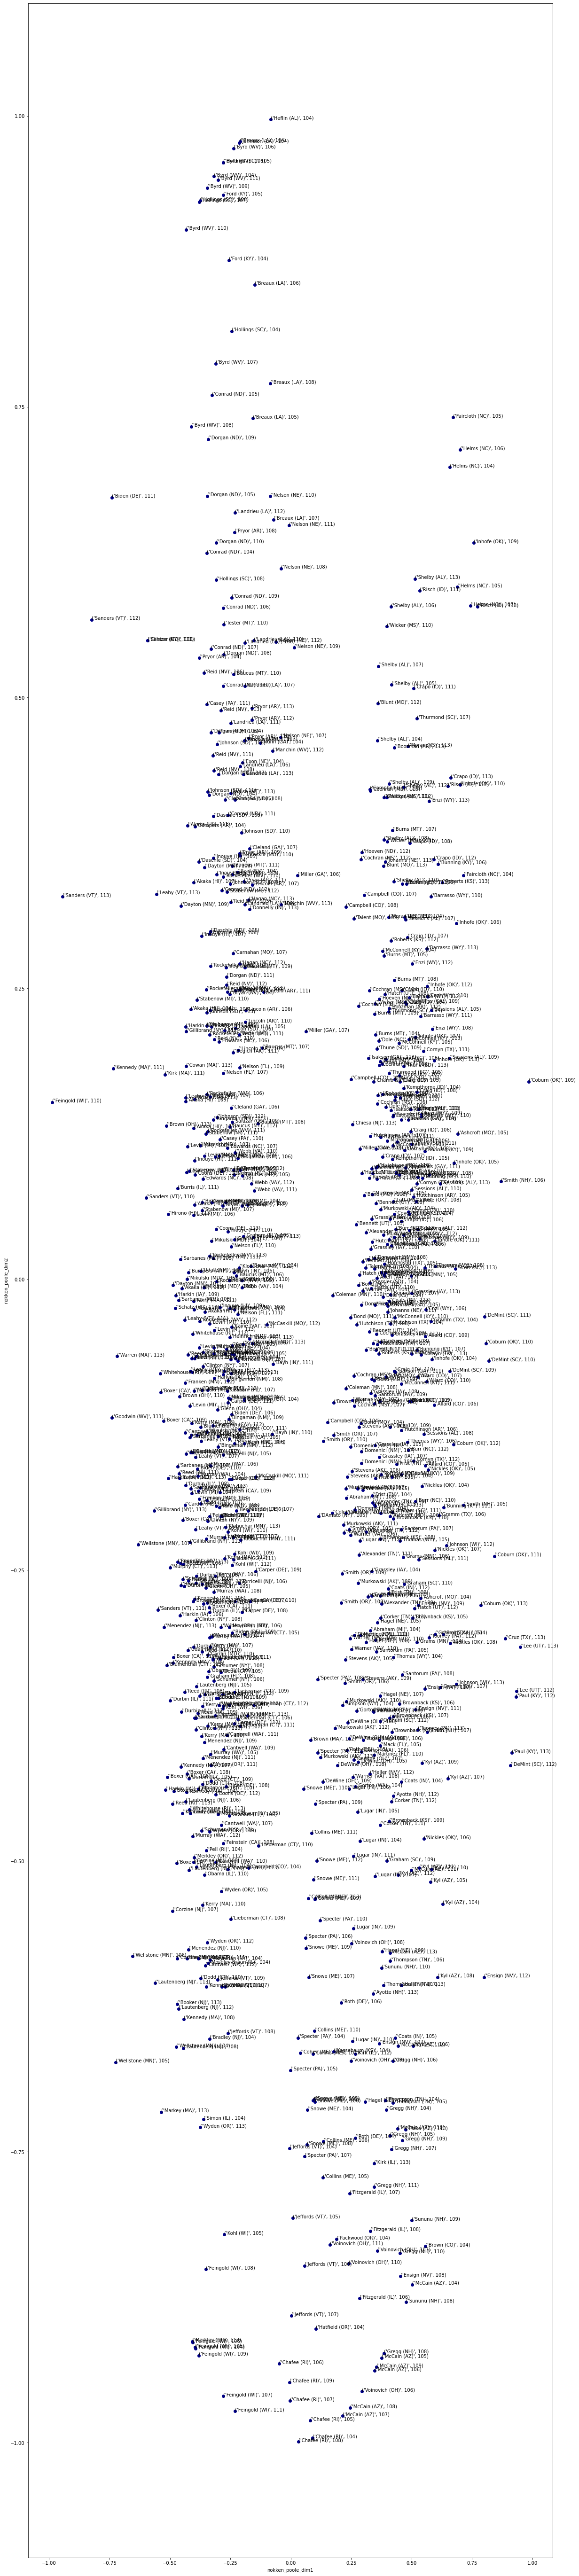

In [1076]:
graphdf = pd.DataFrame(concatmaster, columns = ['speaker.name', 'congress', 'nokken_poole_dim1', 'nokken_poole_dim2'])

fig, ax = plt.subplots(figsize=(20,100))

##plot
ax.scatter(x=graphdf['nokken_poole_dim1'],y=graphdf['nokken_poole_dim2'],c='DarkBlue')
##set labels
ax.set_xlabel('nokken_poole_dim1')
ax.set_ylabel('nokken_poole_dim2')

for idx, row in graphdf.iterrows():
    ax.annotate((row['speaker.name'], row['congress']), (row['nokken_poole_dim1'], row['nokken_poole_dim2']) )
# force matplotlib to draw the graph
plt.show()


predict proba method (pyplot alpha -transparency)

In [1077]:
dataTest.shape

(99, 34805)

In [1078]:
partyID=list()
missing=list()
match=False
count=0;

for senator in dataTest['senator_id']:
    for index,row in data1.iterrows():
        match=False;
        if row['speakerID']==senator and row['congress']==108:
            if row['party'].startswith('D'):
               ## print(senator)
                ##Democrat/ liberal
                partyID.append(1)
                match=True
                ##44 119 162 176 190
            else:
                ##print(senator)
                ##Republican/conservative
                partyID.append(0)
                match=True
            if match==False:
                missing.append(senator)
                count+=1
           ## print(row['party'])

In [1079]:
len(partyID)

99

In [1080]:
##partyID
dataTest = dataTest.iloc[:, 1:]

In [1081]:
test_X = dataTest.iloc[0:10, : ]
test_y = (partyID[0:10])  # try taking the last part out
test_y[0:15]

[1, 0, 0, 1, 1, 0, 1, 1, 0, 1]

In [1082]:
dataTest.shape

(99, 34804)

In [1083]:
len(partyID)

99

In [1084]:
train_X = dataTest.iloc[10: , : ]
train_y = (partyID[10:])
train_y[0:25]

[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]

In [1085]:
##train_X

In [1086]:
##trainscaler = StandardScaler()
##trainXscaled = trainscaler.fit_transform(train_X)
##trainXscaled = pd.DataFrame(trainXscaled, columns = train_X.columns)
##trainXscaled.head()

In [1087]:
##testscaler = StandardScaler()
##testXscaled = testscaler.fit_transform(test_X)
##testXscaled = pd.DataFrame(testXscaled, columns = test_X.columns)
##testXscaled.head()

In [1088]:
logist = LogisticRegression(C = 0.001, max_iter = 1000, class_weight = 'balanced') 
logist.fit(train_X, train_y)

predictions = np.round(logist.predict_proba(test_X),4)
#print(predictions)
probabilities=predictions[:,1]
print(probabilities)
test_yArr=np.array(test_y)

    
tp = sum((test_yArr >= 0.5) & (probabilities >= 0.5))
fp = sum((test_yArr < 0.5) & (probabilities >= 0.5))
fn = sum((test_yArr >= 0.5) & (probabilities < 0.5))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

##print(np.round(precision, 4), np.round(recall, 4), np.round(F1, 4))
print(np.round(F1, 4))

[0.8901 0.0985 0.2239 0.8735 0.5503 0.597  0.9998 0.0025 0.0052 1.    ]
0.8333


In [1089]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

logist = LogisticRegression(C = .001, max_iter = 1000, class_weight = 'balanced')
results = cross_val_predict(logist, train_X, train_y, cv = 5, method='predict_proba')
##print(np.round(results,4))
##print('Mean f1:', np.mean(results))
predict=results[:,1]

In [1090]:
plotCV=list()
for i in predict:
   ## i=(2*i)-1
    plotCV.append(np.round(i,3))
    ##print(np.round(i,3)
##plotCV

In [1091]:
plotCV=pd.DataFrame(plotCV)

In [1092]:
plotCV=plotCV.rename(columns={0: "LGR Score"})
plotCV

,LGR Score
0,0.491
1,0.026
2,0.418
3,0.290
4,1.000
5,0.506
6,0.119
7,0.036
8,0.285
9,0.427


In [1093]:
##lgrScore=pd.DataFrame(lgrScore)
##lgrScore=lgrScore.rename(columns={0: "LGR Score"})

In [1094]:
myPath108Test = Path('readable/108congress.tsv', error_bad_lines=False, sep='\t', header=None)
dataTest = pd.read_csv(myPath108Test, sep='\t', encoding = 'utf-8')

In [1095]:
senatorList=list()
counter=0
for senator in dataTest['senator_id']:
    for index,row in data1.iterrows():
        if row['speakerID']==senator and row['speakerID']>23 and row['congress']==108:
            senatorList.append(senator)

In [1096]:
senatorList=pd.DataFrame(senatorList)
senatorList=senatorList.rename(columns={0: "speakerID"})
##senatorList=senatorList[10:]

In [1097]:
##result = pd.concat([plotCV, senatorList], axis=1, join='inner')
##display(result)

In [1098]:
myPath108Score = Path('readable/S108_members.csv', error_bad_lines=False, sep=',', header=None)
scoreData = pd.read_csv(myPath108Score, sep=',', encoding = 'utf-8')
pd.set_option("display.max_rows", None, "display.max_columns", None)
##merged108

In [1099]:
nok_pool_Score1=list()
for i in merged108['nokken_poole_dim1']:
        ##print(i)
        nok_pool_Score1.append(i)

In [1100]:
nokDF1=pd.DataFrame(nok_pool_Score1)

In [1101]:
nok_pool_Score2=list()
for i in merged108['nokken_poole_dim2']:
        ##print(i)
        nok_pool_Score2.append(i)

In [1102]:
nokDF2=pd.DataFrame(nok_pool_Score2)

In [1103]:
nokDF2

,0
0,-0.026
1,0.090
2,0.185
3,0.134
4,0.064
5,0.065
6,-0.436
7,-0.087
8,0.072
9,-0.425


In [1104]:
nokDF2=nokDF2.rename(columns={0: "nokken_poole_dim2"})

In [1105]:
nokDF1

,0
0,-0.399
1,0.573
2,0.378
3,-0.136
4,-0.179
5,0.353
6,-0.267
7,-0.259
8,0.304
9,-0.430


In [1106]:
nokDF1
nokDF1=nokDF1.rename(columns={0: "nokken_poole_dim1"})
nokDF2
nokDF2=nokDF2.rename(columns={0: "nokken_poole_dim2"})


In [1107]:
##for i in nokDF1['nokken_poole_dim1']:
   ## i=(i-(-0.465))/(0.66-(-0.465))
    ##print(np.round(i,3))

In [1108]:
##updatedNok=list()
##for i in nokDF1['nokken_poole_dim1']:
    ##i=(i-(-0.465))/(0.66-(-0.465))
   ## updatedNok.append(i)
    ##print(np.round(i,3))

In [1109]:
##nokDF1=pd.DataFrame(updatedNok)

In [1110]:
##nokDF1=nokDF1.rename(columns={0: "nokken_poole_dim1"})

In [1111]:
#nokDF1
#nokDF2

In [1112]:
newNokDF1=nokDF1.iloc[10:]

In [1113]:
newNokDF1=newNokDF1.reset_index(drop=True)

In [1114]:
newNokDF2=nokDF2.iloc[10:]

In [1115]:
newNokDF2=newNokDF2.reset_index(drop=True)

In [1116]:
#nokDF1
result = pd.concat([plotCV, senatorList,newNokDF1,newNokDF2], axis=1, join='outer')

In [1117]:
result

,LGR Score,speakerID,nokken_poole_dim1,nokken_poole_dim2
0,0.491,25,-0.084,0.770
1,0.026,29,0.370,-0.223
2,0.418,32,0.480,0.340
3,0.290,33,0.428,0.257
4,1.000,36,-0.411,0.733
5,0.506,37,0.229,0.320
6,0.119,38,-0.313,-0.375
7,0.036,41,-0.202,-0.286
8,0.285,44,0.032,-0.999
9,0.427,45,0.399,0.030


<AxesSubplot:label='18c7c8ae-2e84-4de1-9626-0460feb1dbbd'>

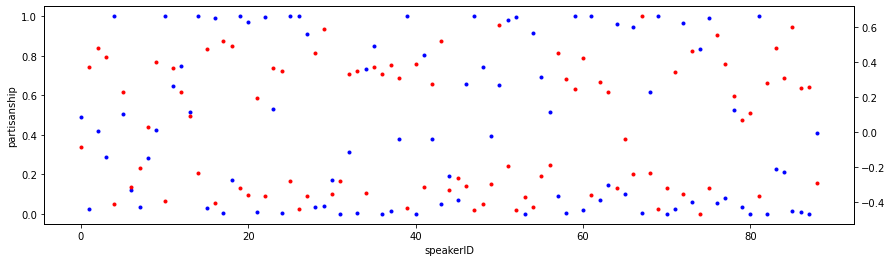

In [1118]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
##df = DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])

fig, ax = plt.subplots()
ax2 = ax.twinx()
#rspine = ax3.spines['right']
rspine.set_position(('axes', 2))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=2)


ax.set(xlabel="speakerID", ylabel="partisanship")
ax2.set(ylabel="nokken_poolescore")

result['LGR Score'].plot(ax=ax, color='blue',style='.')
# same ax as above since it's automatically added on the right
result['nokken_poole_dim1'].plot(ax=ax2, color='red',style='.', secondary_y=True)
##df.C.plot(ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
##ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
      ##     ['LGR Score','nokken_poole_dim1'], bbox_to_anchor=(1, -1))


<AxesSubplot:xlabel='LGR Score', ylabel='nokken_poole_dim1'>

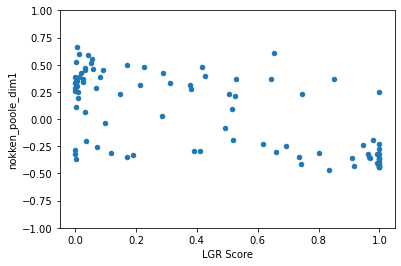

In [1126]:

result.plot(kind = 'scatter',x ='LGR Score', y = 'nokken_poole_dim1', ylim=(-1,1) )

<AxesSubplot:xlabel='LGR Score', ylabel='nokken_poole_dim2'>

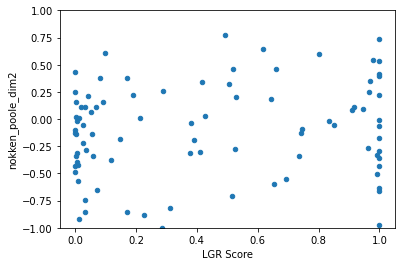

In [1120]:
result.plot(kind = 'scatter',x ='LGR Score', y = 'nokken_poole_dim2', ylim=(-1,1) )

In [1121]:
from scipy.stats import pearsonr

In [1122]:
pearsonr(result['nokken_poole_dim2'], result['LGR Score'])

(0.15269384292014512, 0.15313682207414184)

In [1123]:
pearsonr(result['nokken_poole_dim1'], result['LGR Score'])

(-0.6469460382525802, 7.415930067110397e-12)

first dimension is economic, second dimension is social, cultural, lifestyle